# SISSO Analysis

In [53]:
# Importing the libraries

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [54]:
# Data

data = pd.read_csv('material_data.dat', sep=' ')
data = data.dropna()

### All materials:

- Model 1 (Just atomic features)

In [55]:
# Separating training and testing sets

features_1 = ['id', 'ef', 'covalent_radius', 'covalent_radius_max', 'covalent_radius_min', 'nuclear_charge', 'nuclear_charge_max', 'nuclear_charge_min', 'electronegativity', 'electronegativity_max', 'electronegativity_min', 'electron_affinity', 'electron_affinity_max', 'electron_affinity_min', 'ionization_energy', 'ionization_energy_max', 'ionization_energy_min']

data_1 = data[features_1]

n_train = int(len(data)*0.9)
n_test = len(data) - n_train

df_train = data_1.sample(n=n_train, random_state=24)
df_train.to_csv('train_1.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_1.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_1.dat', index=False, sep=' ')

- Model 2 (Just bond features)

In [56]:
# Separating training and testing sets

features_2 = ['id', 'ef', 'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'E+', 'E-', 'E*', 'E÷', 'EA+', 'EA-', 'EA*', 'EA÷', 'I+', 'I-', 'I*', 'I÷']

data_2 = data[features_2]

n_train = int(len(data)*0.9)
n_test = len(data) - n_train

df_train = data_2.sample(n=n_train, random_state=24)
df_train.to_csv('train_2.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_2.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_2.dat', index=False, sep=' ')

- Model 3 (All features)

In [57]:
# Separating training and testing sets

features_3 = ['id', 'ef', 'covalent_radius', 'covalent_radius_max', 'covalent_radius_min', 'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'nuclear_charge', 'nuclear_charge_max', 'nuclear_charge_min', 'electronegativity', 'electronegativity_max', 'electronegativity_min', 'E+', 'E-', 'E*', 'E÷', 'electron_affinity', 'electron_affinity_max', 'electron_affinity_min', 'EA+', 'EA-', 'EA*', 'EA÷', 'ionization_energy', 'ionization_energy_max', 'ionization_energy_min', 'I+', 'I-', 'I*', 'I÷']

data_3 = data[features_3]

n_train = int(len(data)*0.9)
n_test = len(data) - n_train

df_train = data_3.sample(n=n_train, random_state=24)
df_train.to_csv('train_3.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_3.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_3.dat', index=False, sep=' ')

---

With the trained models, it is possible to analyze their performance:

In [58]:
# Evaluating model 1

df = pd.read_csv('test_1.dat', sep=' ')
df = df.dropna()

c0 = 0.4846461088
ci = -0.5512246865E+01

pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['electronegativity'] / row['ionization_energy_max']) * (row['electronegativity_max'] - row['electronegativity_min'])) 
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.5917
R²: 0.6463
Mean Absolute Error (MAE): 0.4411


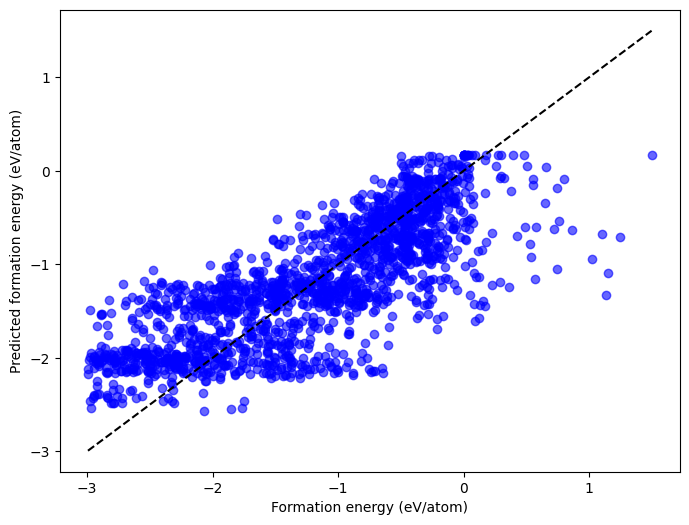

In [75]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

In [76]:
# Evaluating model 2

df = pd.read_csv('test_2.dat', sep=' ')
df = df.dropna()

c0 = -0.1122626337E+01
ci =  -0.1090895013E-02

pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['EA-'] + row['I+']) + (row['I+'] + row['I-'])) 
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.9229
R²: 0.1395
Mean Absolute Error (MAE): 0.7874


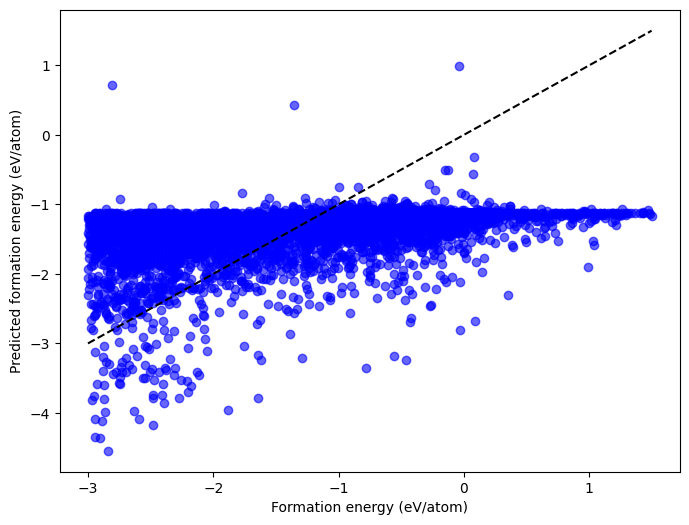

In [77]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

In [78]:
# Evaluating model 3

df = pd.read_csv('test_3.dat', sep=' ')
df = df.dropna()

c0 = 0.4846461088E+00
ci = -0.5512246865E+01

pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['electronegativity'] / row['ionization_energy_max']) * (row['electronegativity_max'] - row['electronegativity_min']))
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.5917
R²: 0.6463
Mean Absolute Error (MAE): 0.4411


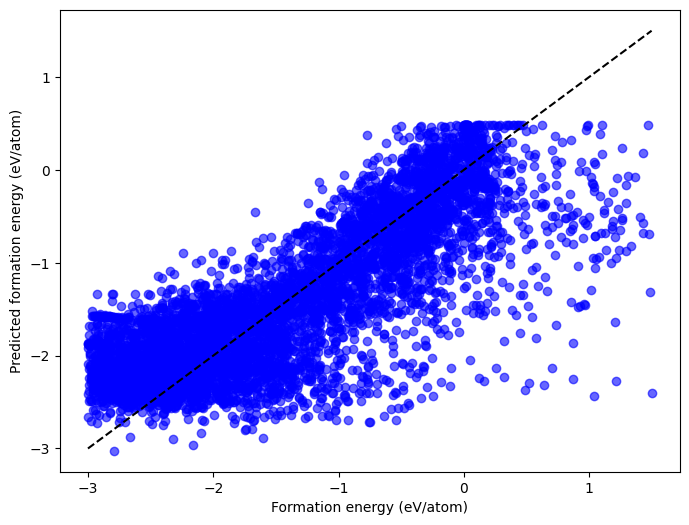

In [79]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

---

### Removing theoretical materials:

In [80]:
data_exp = data[data["theoretical"] != True]

- Model 1 (Just atomic features)

In [81]:
# Separating training and testing sets

features_1 = ['id', 'ef', 'covalent_radius', 'covalent_radius_max', 'covalent_radius_min', 'nuclear_charge', 'nuclear_charge_max', 'nuclear_charge_min', 'electronegativity', 'electronegativity_max', 'electronegativity_min', 'electron_affinity', 'electron_affinity_max', 'electron_affinity_min', 'ionization_energy', 'ionization_energy_max', 'ionization_energy_min']

data_1 = data_exp[features_1]

n_train = int(len(data_exp)*0.9)
n_test = len(data_exp) - n_train

df_train = data_1.sample(n=n_train, random_state=24)
df_train.to_csv('train_1_exp.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_1.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_1_exp.dat', index=False, sep=' ')

- Model 2 (Just bond features)

In [82]:
# Separating training and testing sets

features_2 = ['id', 'ef', 'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'E+', 'E-', 'E*', 'E÷', 'EA+', 'EA-', 'EA*', 'EA÷', 'I+', 'I-', 'I*', 'I÷']

data_2 = data_exp[features_2]

n_train = int(len(data_exp)*0.9)
n_test = len(data_exp) - n_train

df_train = data_2.sample(n=n_train, random_state=24)
df_train.to_csv('train_2_exp.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_2.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_2_exp.dat', index=False, sep=' ')

- Model 3 (All features)

In [83]:
# Separating training and testing sets

features_3 = ['id', 'ef', 'covalent_radius', 'covalent_radius_max', 'covalent_radius_min', 'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'nuclear_charge', 'nuclear_charge_max', 'nuclear_charge_min', 'electronegativity', 'electronegativity_max', 'electronegativity_min', 'E+', 'E-', 'E*', 'E÷', 'electron_affinity', 'electron_affinity_max', 'electron_affinity_min', 'EA+', 'EA-', 'EA*', 'EA÷', 'ionization_energy', 'ionization_energy_max', 'ionization_energy_min', 'I+', 'I-', 'I*', 'I÷']

data_3 = data_exp[features_3]

n_train = int(len(data_exp)*0.9)
n_test = len(data_exp) - n_train

df_train = data_3.sample(n=n_train, random_state=24)
df_train.to_csv('train_3_exp.dat', index=False, sep=' ')

indices = list(df_train.index)
new_df = data_3.drop(indices)

df_test = new_df.sample(n=n_test, random_state=24)
df_test.to_csv('test_3_exp.dat', index=False, sep=' ')

---

With the trained models, it is possible to analyze their performance:

In [84]:
# Evaluating model 1

df = pd.read_csv('test_1_exp.dat', sep=' ')
df = df.dropna()

c0 = 0.1711354028
ci = -0.3587942018E+01
pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['electronegativity'] / row['ionization_energy']) * (row['electronegativity_max'] - row['electronegativity_min']))
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.5352
R²: 0.6132
Mean Absolute Error (MAE): 0.4148


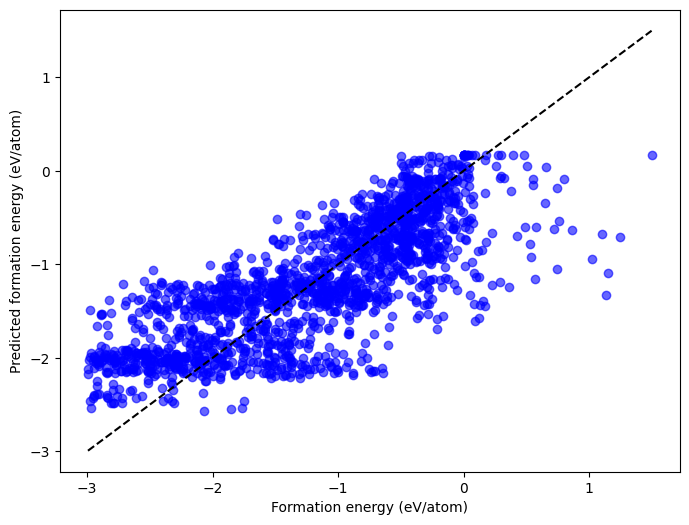

In [85]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

In [86]:
# Evaluating model 2

df = pd.read_csv('test_2_exp.dat', sep=' ')
df = df.dropna()

c0 = -0.9897270477
ci = 0.2292885452E-02

pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['EA+'] - row['EA-']) - (row['EA-'] + row['EA*'])) 
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.7798
R²: 0.1787
Mean Absolute Error (MAE): 0.6292


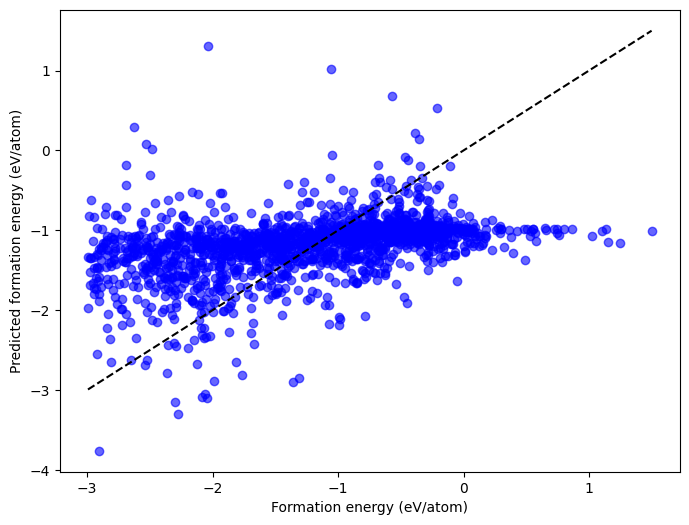

In [87]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

In [88]:
# Evaluating model 3

df = pd.read_csv('test_3_exp.dat', sep=' ')
df = df.dropna()

c0 = 0.1711354028
ci = -0.3587942018E+01

pred = []

for i, row in df.iterrows():
    value = (
        c0
        + ci * ((row['electronegativity'] / row['ionization_energy']) * (row['electronegativity_max'] - row['electronegativity_min']))
    )
    pred.append(value)

mse = mean_squared_error(df['ef'], pred)
rmse = np.sqrt(mse)
r2 = r2_score(df['ef'], pred)
mae = mean_absolute_error(df['ef'], pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.5352
R²: 0.6132
Mean Absolute Error (MAE): 0.4148


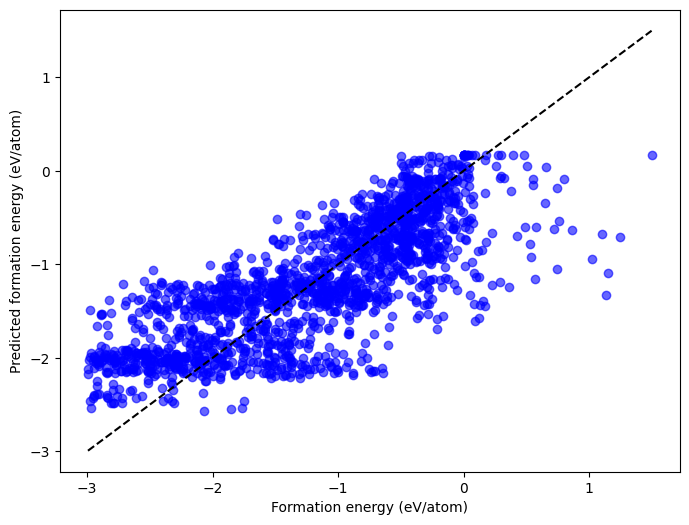

In [89]:
# Correlation scatter plot of formation energies

plt.figure(figsize=(8, 6))
plt.scatter(df['ef'], pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()